### Overview
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

A tumor can be cancerous or benign. A cancerous tumor is malignant, meaning it can grow and spread to other parts of the body. A benign tumor means the tumor can grow but will not spread.

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present

0= Benign (Not Cancerous) - Absent

Since labels are discrete, the predictions falls into categorical type (i.e. Malignant or benign).

### Data Set Information
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image

### features list
Ten real-valued features are computed for each cell nucleus:

1. **radius**: mean of distances from center to points on the perimeter

2. **texture**: standard deviation of gray-scale values`       
3. **perimeter**        
4. **area**
5. **smoothness**: local variation in radius lengths`
6. **compactness**: perimeter^2 / area - 1.0
7. **concavity**: severity of concave portions of the contour
8. **concave points**: number of concave portions of the contour       
9. **symmetry**      
10. **fractal dimension**: coastline approximation `



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# learning algorithm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# required metrics for evaluating the algorithm performance on the test data
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import f1_score,recall_score

# import pickle for saving model
import pickle


In [3]:
breast_cancer_df= load_breast_cancer()
breast_cancer_df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df= pd.DataFrame(breast_cancer_df.data,columns=breast_cancer_df.feature_names)
df['diagnosis']= breast_cancer_df.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


from the data information,the following were observed:
* There are no columns with a missing value
* All columns have there datatype as float accept the 'diagnosis' column which is an integer
* the shape of the dataframe is (569,31)




##  DATA VISUALIZATION AND CLEANINGS

### Data visualization

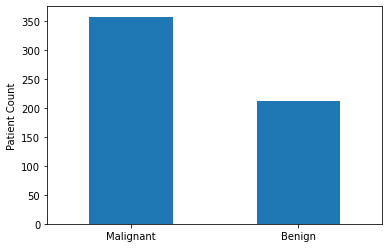

In [10]:
var=df['diagnosis'].value_counts()
var.plot(kind='bar',ylabel='Patient Count')
plt.xticks(ticks=[0,1],labels=['Malignant','Benign'],rotation=0)
plt.show()

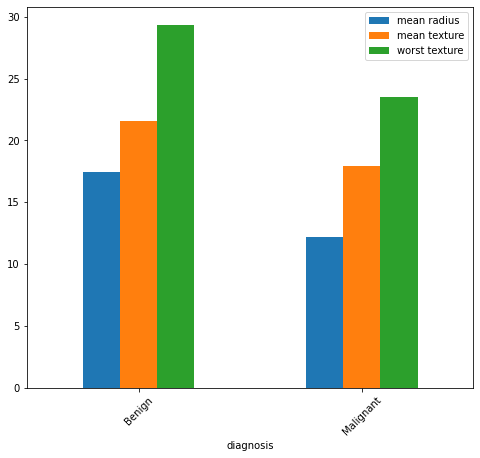

In [12]:
df_avg= df.groupby('diagnosis').mean()
sub_df_avg=['mean radius','mean texture','worst texture']
df_avg[sub_df_avg].plot.bar(figsize= (8,7))
plt.xticks(ticks=[0,1],labels=['Benign','Malignant'],rotation=45)
plt.show()

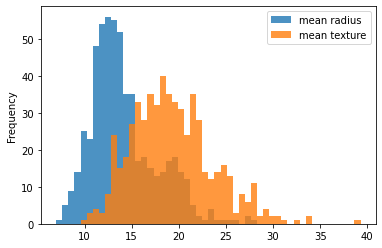

In [14]:
fig,ax= plt.subplots()
features=['mean radius','mean texture']
sub_df= df[features]
sub_df.plot.hist(bins=50,alpha=0.8,ax=ax);

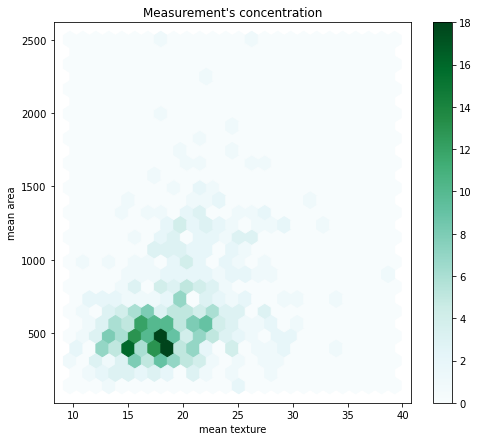

In [69]:
fig,ax=plt.subplots(figsize=(8,7))
df.plot.hexbin(x='mean texture',y='mean area',
               cmap='BuGn',
               gridsize= 25,
               title= 'Measurement\'s concentration'
               ,ax=ax);

#BuGn

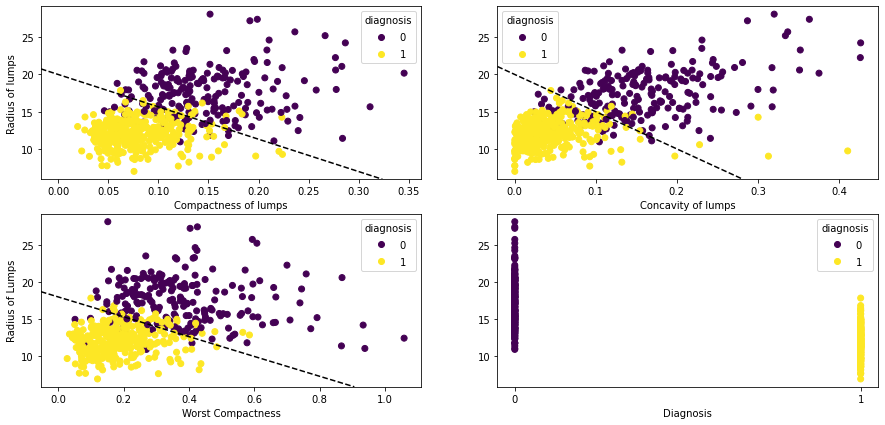

In [53]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,7))


var=ax1.scatter(df['mean compactness'],df['mean radius'],c=df['diagnosis'])
ax1.set_xlabel('Compactness of lumps')
ax1.set_ylabel('Radius of lumps')
ax1.axline((0.23,10),(0,20),linestyle= "--",color='black')
ax1.legend(*var.legend_elements(), title= "diagnosis")

var2= ax2.scatter(df['mean concavity'],df['mean radius'],c=df['diagnosis'])
ax2.set_xlabel('Concavity of lumps')
ax2.legend(*var2.legend_elements(), title= "diagnosis")
ax2.axline((0.2,10),(0,20),linestyle= "--",color='black')

var3= ax3.scatter(df['worst compactness'],df['mean radius'],c=df['diagnosis'])
ax3.set_ylabel('Radius of Lumps')
ax3.set_xlabel('Worst Compactness')
ax3.legend(*var3.legend_elements(), title= "diagnosis")
ax3.axline((0.6,10),(0,18),linestyle= "--",color='black')

var4= ax4.scatter(df['diagnosis'],df['mean radius'],c=df['diagnosis'])
ax4.legend(*var4.legend_elements(), title= "diagnosis")
ax4.set_xlabel('Diagnosis')
ax4.set_xticks([0,1],[0,1]);


## DATA CLEANING

### Dropping unwanted features 
one way to this is to take into account feature correlation and perform the following:
1. keep all label features with high corroletion to the target feature
2. drop all label features with low correlation to the target
3. for a set of label features with high correlation, i would keep only one and drop the remaining features



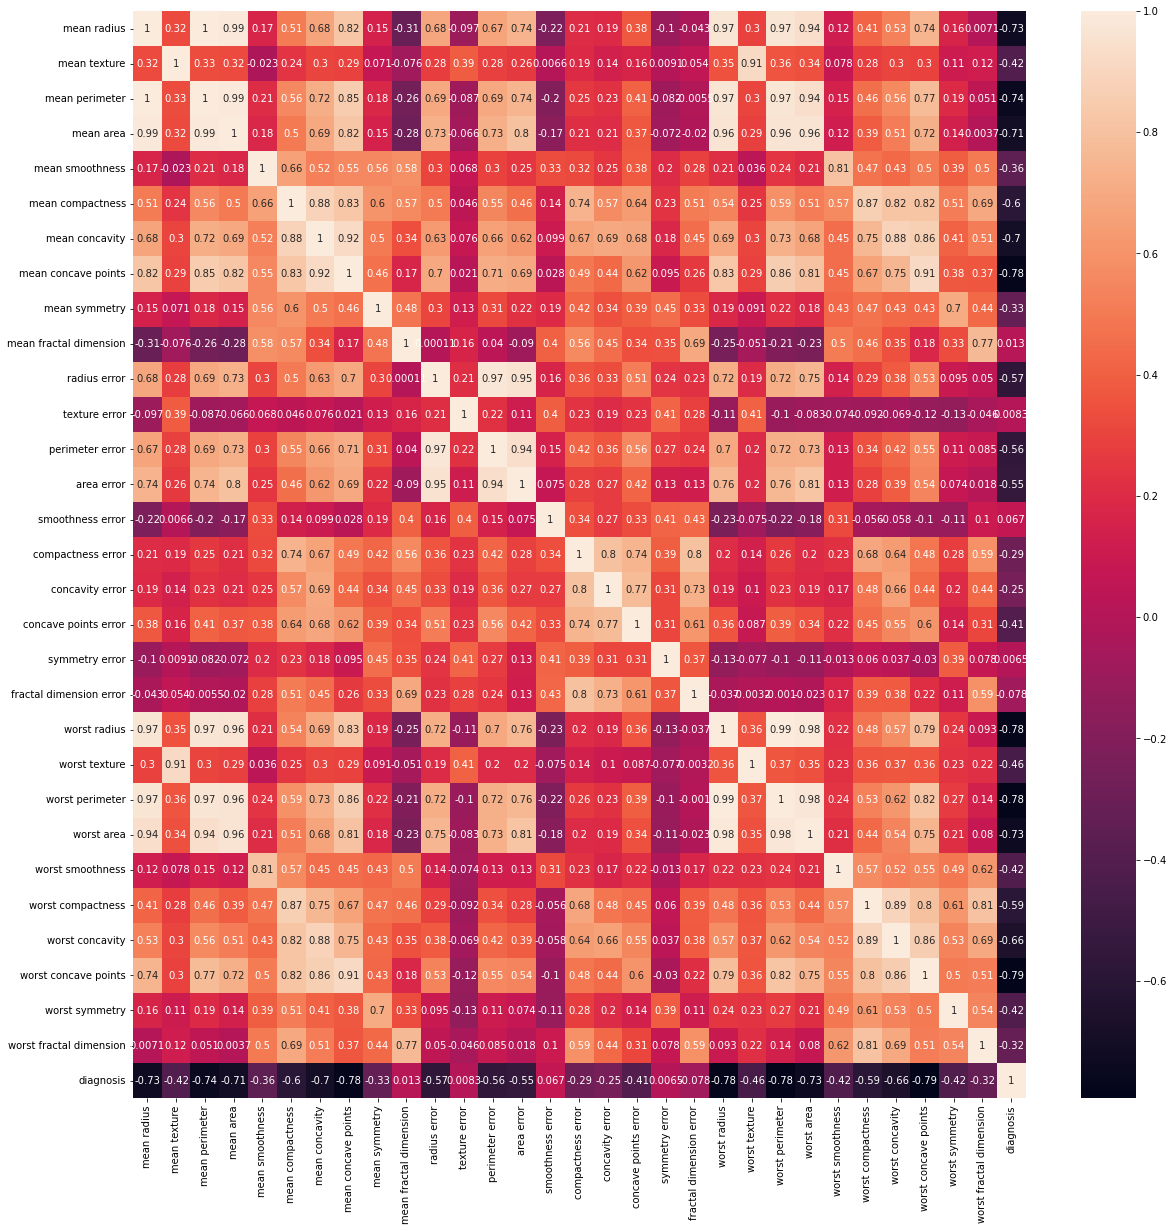

In [12]:
plt.figure(figsize= (20,20))
corrmatrix= df.corr()
sns.heatmap(corrmatrix,annot=True);

In [13]:
corrmatrix= df.corr().abs()
# create an uppper matrix 
upper_tri = corrmatrix.where(np.triu(np.ones(corrmatrix.shape),k=1).astype(bool))

# droping features with high (having morethan 95%) correlation 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df= df.drop(to_drop,axis=1)

# drop features with low (having lessthan 50%) correlation to target feature 
to_drop2= upper_tri[upper_tri['diagnosis']< 0.5].index
df=df.drop(to_drop2,axis=1)

After droping the unwanted feaatures the new dataframe is left with only 9 features.

The shape of the dataframe is now (569,9)

In [14]:
df.shape

(569, 9)

In [15]:
df.head()

,mean radius,mean compactness,mean concavity,mean concave points,radius error,worst compactness,worst concavity,worst concave points,diagnosis
0,17.99,0.27760,0.3001,0.14710,1.0950,0.6656,0.7119,0.2654,0
1,20.57,0.07864,0.0869,0.07017,0.5435,0.1866,0.2416,0.1860,0
2,19.69,0.15990,0.1974,0.12790,0.7456,0.4245,0.4504,0.2430,0
3,11.42,0.28390,0.2414,0.10520,0.4956,0.8663,0.6869,0.2575,0
4,20.29,0.13280,0.1980,0.10430,0.7572,0.2050,0.4000,0.1625,0


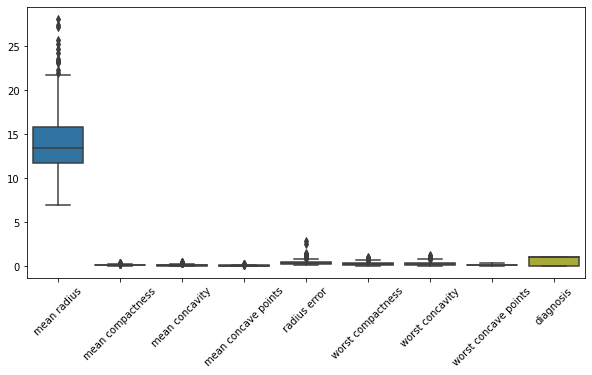

In [16]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df);

observations from boxplot:
1. presence of outliers in the data,which would need to clean.in other to prevent loss of a lot of information,only outliers in the `mean raduis` feature would clean 
2. the `mean raduis` feature have a higher range compared to other features, thus it needs be rescaled 

In [17]:
# cleaning the data
mask= (df['mean radius']<= 25) 
df=df[mask]

# rescaling the 'mean raduis' feature using standard scaler
scaler= StandardScaler()
feature= ['mean radius']
df[feature]= scaler.fit_transform(df[feature])

In [18]:
df.shape

(564, 9)

After cleaning the data and rescaling the mean radius feature,the new shape of the dataframe is (564,9)

the boxplot of the new the dataframe is show below


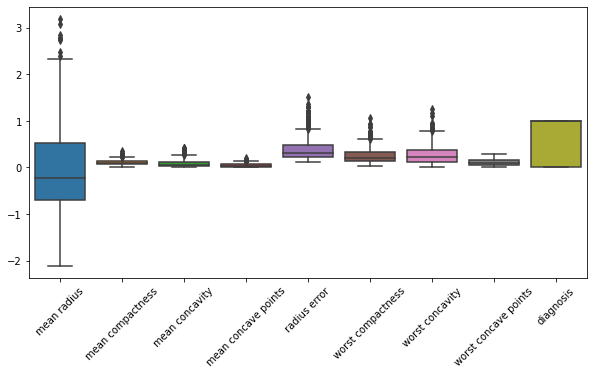

In [19]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df);

## Spliting data 

* the data is splitted into training set and test set.
* 80% of the data makes up the training set while 20% makes up the test set.

In [20]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

np.random.seed(12)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((451, 8), (113, 8), (451,), (113,))

## Model selection

creating a fuction that return a pandas data frame of the
`accuracy, precision,recall,f1-score` for diffrent classification models such as `Linear SVC, Logistic Regression, RandomForestClassifier,KNeighborsClassifier` given the input `x_train,x_test,y_train,y_test`

In [21]:
def evaluate_model(x_train,x_test,
                   y_train,y_test):
   
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    """
    retruns a pandas data frame of the accuracy, precision,
    recall and f1-score of diffrent classification models 
    such as Linear SVC, Logistic Regression, RandomForestClassifier,KNeighborsClassifier
    
    x_train: predictor training set
    x_test: predictor test set
    Y_test: target test set
    y_train: target training set
    """
    from sklearn.svm import LinearSVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    
    from sklearn.metrics import accuracy_score,precision_score
    from sklearn.metrics import f1_score,recall_score
    
    model_dict= {
                'Linear SVC':LinearSVC(),
                'Logistic Regression':LogisticRegression(),
                'RandomForest':RandomForestClassifier(random_state=72),
                'SVC': SVC(),
                'Kneighbours': KNeighborsClassifier()
                }
    
    evaluate_dict={}
    
    for name,model in model_dict.items():
        model.fit(x_train,y_train)
        y_pred= model.predict(x_test)
        
        evaluate= [
                  round((accuracy_score(y_test,y_pred)*100),2),
                  round((precision_score(y_test,y_pred)*100),2),
                  round((f1_score(y_test,y_pred)*100),2),
                  round(recall_score(y_test,y_pred)*100,2)
            
                  ]
        
        evaluate_dict[name]= evaluate
    
    metrics=['Accuracy','Precision','F1-score','recall']   
    evaluate_df= pd.DataFrame(evaluate_dict,index=metrics)
    
    return evaluate_df
        

In [22]:
base_models= evaluate_model(x_train,x_test,y_train,y_test)
base_models

,Linear SVC,Logistic Regression,RandomForest,SVC,Kneighbours
Accuracy,96.46,96.46,96.46,97.35,95.58
Precision,97.22,95.95,97.22,97.26,95.89
F1-score,97.22,97.26,97.22,97.93,96.55
recall,97.22,98.61,97.22,98.61,97.22


All the choice of models are performing well. 

we would run `hyper parameter tuning` on individaul models in order to select the best model.

## Hyperparameter Tuning

In [23]:
def metric(y_test,y_pred):
    """
    Returns the metrics of the model performance
    """
    from sklearn.metrics import accuracy_score,precision_score
    from sklearn.metrics import f1_score,recall_score
    
    
    metrics={'Accuracy' :round(accuracy_score(y_test,y_pred)*100,2),
             'Precision':round(precision_score(y_test,y_pred)*100,2),
             'F1-score':round(f1_score(y_test,y_pred)*100,2 ),
             'recall':round(recall_score(y_test,y_pred)*100,2)}
    
    score={}
    
    for name,metric in metrics.items():
        score[name]= metric
    
        
    
    print(f'Accuracy:{round((accuracy_score(y_test,y_pred)*100),2)}%')
    print(f'Precision:{round((precision_score(y_test,y_pred)*100),2)}%')
    print(f'F1-score:{round((f1_score(y_test,y_pred)*100),2)}%')
    print(f'Recall:{round(recall_score(y_test,y_pred)*100,2)}%')
    
            
    return score   

I prepare several dictionary for hyper parameter tuning using GridSearchCV

* grid_li: dictionary containing list parameters to be use for hyper parameter tuning `LinearSVC()`
* grid_lo: dictionary containing list parameters to be use for hyper parameter tuning `LogisticRegression()`
* grid_Rand: dictionary containing list parameters to be use for hyper parameter tuning `RandomForestClassifier()`
* grid_ngb: dictionary containing list parameters to be use for hyper parameter tuning `KNeighborsClassifier()`
* grid_SVC: dictionary containing list parameters to be use for hyper parameter tuning `SVC()`

In [24]:
grid_li= {'C':np.arange(0.1,1.5,0.025),
          'max_iter': [10000,30000,50000], }

grid_lo= {'C':np.arange(0.1,1.5,0.025),
          'max_iter':[100,500,1000],
          'solver': ['lbfgs','newton-cg','liblinear' ]}

grid_Rand= {'n_estimators': [100],
            'max_depth': list(range(2,30)),
            'min_samples_leaf':[1],
            'min_samples_split': [2],
            'random_state':[72]}

grid_ngb= {'n_neighbors':[5,7,10],
          'p':[1,2]}

grid_SVC= {'C':np.arange(0.1,1.5,0.025),
           'kernel':['poly','rbf','sigmoid'],}

### Hyper parameter tuning of LinearSVC

In [25]:
gs_linear= GridSearchCV(LinearSVC(),
                        grid_li,
                        cv=5,
                        verbose=True,
                        scoring= 'f1')
gs_linear.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  ,
       0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525,
       0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 ,
       0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975,
       1.   , 1.025, 1.05 , 1.075, 1.1  , 1.125, 1.15 , 1.175, 1.2  ,
       1.225, 1.25 , 1.275, 1.3  , 1.325, 1.35 , 1.375, 1.4  , 1.425,
       1.45 , 1.475]),
                         'max_iter': [10000, 30000, 50000]},
             scoring='f1', verbose=True)

In [26]:
y_pred_lin= gs_linear.predict(x_test)

gs_linear.score(x_test,y_test)

linearSVC= metric(y_test,y_pred_lin)

Accuracy:96.46%
Precision:97.22%
F1-score:97.22%
Recall:97.22%


### Hyper parameter tuning of LogisticRegression

In [27]:
gs_lo= GridSearchCV(LogisticRegression(),
                        grid_lo,
                        cv=5,
                        verbose=True,
                        scoring='accuracy')
gs_lo.fit(x_train,y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  ,
       0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525,
       0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 ,
       0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975,
       1.   , 1.025, 1.05 , 1.075, 1.1  , 1.125, 1.15 , 1.175, 1.2  ,
       1.225, 1.25 , 1.275, 1.3  , 1.325, 1.35 , 1.375, 1.4  , 1.425,
       1.45 , 1.475]),
                         'max_iter': [100, 500, 1000],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring='accuracy', verbose=True)

In [28]:
y_pred_lo= gs_lo.predict(x_test)

gs_lo.score(x_test,y_test)

logistic= metric(y_test,y_pred_lo)

Accuracy:96.46%
Precision:95.95%
F1-score:97.26%
Recall:98.61%


### Hyper parameter tuning of KNeighborsClassifier

In [29]:
gs_neig=  GridSearchCV(KNeighborsClassifier(),
                        grid_ngb,
                        cv=5,
                        verbose=True,
                        scoring= 'f1')
gs_neig.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 10], 'p': [1, 2]}, scoring='f1',
             verbose=True)

In [30]:
y_pred_neig= gs_neig.predict(x_test)

gs_neig.score(x_test,y_test)

kneighbours= metric(y_test,y_pred_neig)

Accuracy:98.23%
Precision:98.61%
F1-score:98.61%
Recall:98.61%


### Hyper parameter tuning of SVC

In [31]:
gs_SVC=  GridSearchCV(SVC(),
                      grid_SVC,
                      cv=5,
                      verbose=True,
                      scoring= 'f1')

gs_SVC.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  ,
       0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525,
       0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 ,
       0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975,
       1.   , 1.025, 1.05 , 1.075, 1.1  , 1.125, 1.15 , 1.175, 1.2  ,
       1.225, 1.25 , 1.275, 1.3  , 1.325, 1.35 , 1.375, 1.4  , 1.425,
       1.45 , 1.475]),
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=True)

In [32]:
y_pred_SVC= gs_SVC.predict(x_test)

gs_SVC.score(x_test,y_test)

svc= metric(y_test,y_pred_SVC)

Accuracy:97.35%
Precision:97.26%
F1-score:97.93%
Recall:98.61%


### Hyper parameter tuning of RandomForestClassifier

In [33]:

gs_rand= GridSearchCV(RandomForestClassifier(random_state=72),
                      grid_Rand,
                      cv=5,
                      verbose=True,
                      scoring='f1')

gs_rand.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=72),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [72]},
             scoring='f1', verbose=True)

In [34]:
y_pred_rand= gs_rand.predict(x_test)

gs_rand.score(x_test,y_test)

random_forest= metric(y_test,y_pred_rand)


Accuracy:96.46%
Precision:97.22%
F1-score:97.22%
Recall:97.22%


### Selecting the best model

In [35]:
tuned_models= pd.DataFrame([linearSVC,logistic,random_forest,svc,kneighbours,],index=['Linear SVC_tuned',
                                                                                     'Logistic Regression_tuned',
                                                                                     'RandomForest_tuned',
                                                                                     'SVC_tuned',
                                                                                     'Kneighbours_tuned'])
tuned_models=tuned_models.T
tuned_models

,Linear SVC_tuned,Logistic Regression_tuned,RandomForest_tuned,SVC_tuned,Kneighbours_tuned
Accuracy,96.46,96.46,96.46,97.35,98.23
Precision,97.22,95.95,97.22,97.26,98.61
F1-score,97.22,97.26,97.22,97.93,98.61
recall,97.22,98.61,97.22,98.61,98.61


In [36]:
base_models

,Linear SVC,Logistic Regression,RandomForest,SVC,Kneighbours
Accuracy,96.46,96.46,96.46,97.35,95.58
Precision,97.22,95.95,97.22,97.26,95.89
F1-score,97.22,97.26,97.22,97.93,96.55
recall,97.22,98.61,97.22,98.61,97.22


In [37]:
acc_compare=pd.concat([base_models,tuned_models],axis=1)
acc_compare

,Linear SVC,Logistic Regression,RandomForest,SVC,Kneighbours,Linear SVC_tuned,Logistic Regression_tuned,RandomForest_tuned,SVC_tuned,Kneighbours_tuned
Accuracy,96.46,96.46,96.46,97.35,95.58,96.46,96.46,96.46,97.35,98.23
Precision,97.22,95.95,97.22,97.26,95.89,97.22,95.95,97.22,97.26,98.61
F1-score,97.22,97.26,97.22,97.93,96.55,97.22,97.26,97.22,97.93,98.61
recall,97.22,98.61,97.22,98.61,97.22,97.22,98.61,97.22,98.61,98.61


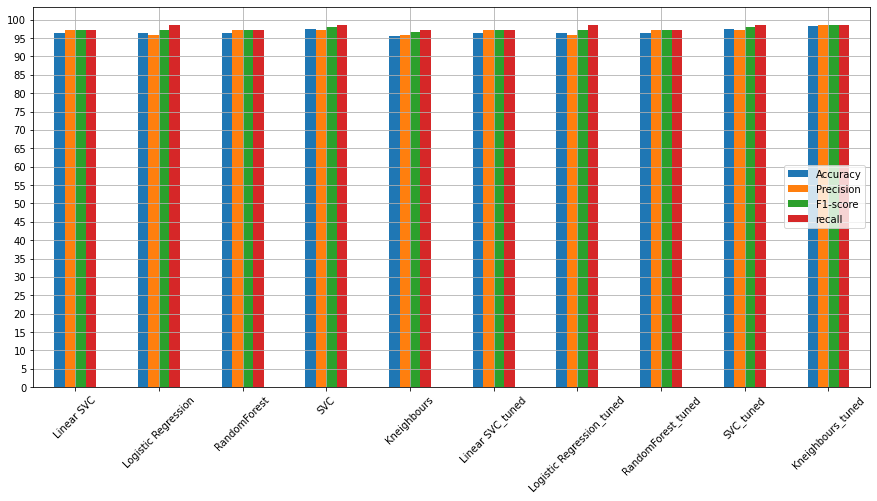

In [38]:
# plt.figure(figsize=(10,10))
fig,ax= plt.subplots(figsize=(15,7))
acc_compare.T.plot.bar(ax=ax,grid=True)
plt.xticks(rotation=45);
plt.yticks(np.arange(0,105,5));
plt.legend(loc='center right');

#### Observations
* hyper parameter tuning did not change the performance of the Linear_SVC,Logistic Regression,RandomForest and SVC models.
* the performance of the Kneighbours model improved after hyper parameter tuning
* finally, the Kneighboures_tuned model has the best performance. its performance metrics are:
    * Accuracy: 98.23
    * Precision: 98.61
    * F1_score: 98.61
    * Recall: 98.61

### Save model

In [39]:
# saving Model
data= {'model': gs_neig,
       'scaler':scaler}

with open('Bmodel_step.pkl','wb') as file:
    pickle.dump(data,file)